<a href="https://colab.research.google.com/github/lprockop/NLPGroup10/blob/main/PrelimAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Final Project

## Last updated:
04/14/23, Lyle

### Current state:
  
Data is imported and eFMD scores are run.  
eFMD already includes necessary preprocessing steps (removing special characters and lowercasing letters) so those steps are kept in at the end in case we want to use them for other scorers/analyses.

Update as of 04/09:
- Ran vice-virtue scoring 
- Graphed sanctity.vice scores

### Note: 
After making any updates, please File > Save a Copy in GitHub to update the shared GitHub project

### Import data

In [1]:
#read in csvs (note: I've downloaded these from the Data Google folder and re-uploaded in this runtime)
import pandas as pd
nyt = pd.read_csv('first_1200_articles.csv').drop(columns='Unnamed: 0')
sc = pd.read_csv('Abortion_final.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

#add year column to NYT dataset
year = []
for i in nyt.pub_date:
  year.append(int(i[0:4]))
nyt['year'] = year

### Sentiment analysis using eFMD

In [2]:
#install necessary modules
!pip install -U pip setuptools wheel
!pip install -U spacy==3.4.0
!python -m spacy download en_core_web_sm
!pip install git+https://github.com/medianeuroscience/emfdscore.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.2 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.35.1
    Uninstalling wheel-0.35.1:
      Successfully uninstalled wheel-0.35.1
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.6.3
    Uninstalling setuptools-65.6.3:
      Successfully uninstalled setuptools-65.6.3
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.27 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cl

In [3]:
#import packages we'll need
import pandas as pd 
import numpy as np

In [4]:
#format text columns in the proper format for eFMD...
#...in NYT dataframe
template_input_nyt = pd.DataFrame(nyt['abstract']).sort_values('abstract', ascending=False).dropna()
template_input_nyt = template_input_nyt[template_input_nyt['abstract']!=''].sort_values('abstract').rename({'abstract':0}, axis=1)
template_input_nyt = template_input_nyt.reset_index().drop('index', axis=1)
#...in SC dataframe
template_input_sc = pd.DataFrame(sc['text']).sort_values('text', ascending=False).dropna()
template_input_sc = template_input_sc[template_input_sc['text']!=''].sort_values('text').rename({'text':0}, axis=1)
template_input_sc = template_input_sc.reset_index().drop('index', axis=1)

In [5]:
#import and run eFMD scoring
from emfdscore.scoring import score_docs 
num_docs_nyt = len(template_input_nyt)
num_docs_sc = len(template_input_sc)
DICT_TYPE = 'emfd'
PROB_MAP = 'all'
SCORE_METHOD = 'bow'
OUT_METRICS = 'sentiment'
#create new dfs to hold the results
df_nyt = score_docs(template_input_nyt, DICT_TYPE, PROB_MAP, SCORE_METHOD, OUT_METRICS, num_docs_nyt)
df_sc = score_docs(template_input_sc, DICT_TYPE, PROB_MAP, SCORE_METHOD, OUT_METRICS, num_docs_sc)
#combine dfs that hold the initial data with the results
nyt_df = pd.concat((nyt, df_nyt), axis=1)
sc_df = pd.concat((sc, df_sc), axis=1)
#examine output for SC
sc_df.head()

2023-04-17 15:51:21.323102: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Processed: 1189 100% |❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤| Elapsed Time: 0:00:04 Time:  0:00:04
Processed: 35 100% |❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤| Elapsed Time: 0:00:10 Time:  0:00:10


,Unnamed: 0.2,author_name,category,per_curiam,case_name,date_filed,federal_cite_one,absolute_url,cluster,year_filed,...,authority_p,sanctity_p,care_sent,fairness_sent,loyalty_sent,authority_sent,sanctity_sent,moral_nonmoral_ratio,f_var,sent_var
0,0,Justice Blackmun,majority,False,Roe v. Wade,1973-01-22,NaN,https://www.courtlistener.com/opinion/108713/r...,https://www.courtlistener.com/api/rest/v3/clus...,1973,...,0.104120,0.088544,-0.078838,-0.049894,-0.024090,-0.022071,-0.050575,0.881183,0.000073,0.000541
1,1,Justice O'Connor and Kennedy and Souter,majority,False,Planned Parenthood of Southeastern Pa. v. Casey,1992-06-29,NaN,https://www.courtlistener.com/opinion/112786/p...,NaN,1992,...,0.104372,0.092741,-0.071447,-0.045651,-0.026034,-0.034011,-0.047386,1.399520,0.000089,0.000296
2,2,Justice Stewart,concurring,False,Roe v. Wade,1973-01-22,NaN,https://www.courtlistener.com/opinion/108713/r...,https://www.courtlistener.com/api/rest/v3/clus...,1973,...,0.104660,0.086185,-0.089379,-0.015917,-0.007430,-0.005189,-0.051946,1.174528,0.000169,0.001313
3,3,Justice Rehnquist,dissenting,False,Roe v. Wade,1973-01-22,NaN,https://www.courtlistener.com/opinion/108713/r...,https://www.courtlistener.com/api/rest/v3/clus...,1973,...,0.104747,0.082228,-0.089115,-0.024546,-0.029659,-0.038441,-0.071355,1.054968,0.000187,0.000795
4,4,per_curiam,per_curiam,True,Poelker v. Doe,1977-06-20,NaN,https://www.courtlistener.com/opinion/109712/p...,https://www.courtlistener.com/api/rest/v3/clus...,1977,...,0.105832,0.086574,-0.080738,-0.044666,-0.030372,-0.028697,-0.051229,1.013566,0.000106,0.000443


## Moral to Non-moral Ratio

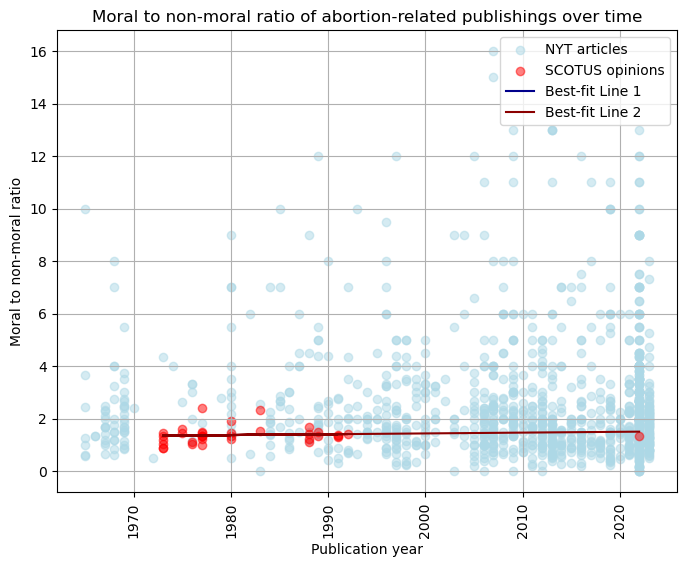

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(nyt_df.year, nyt_df.moral_nonmoral_ratio, alpha=0.5, color='lightblue', label='NYT articles')
plt.scatter(sc_df.year_filed, sc_df.moral_nonmoral_ratio, alpha=0.5, color='red', label='SCOTUS opinions')

coefficients_nyt = np.polyfit(nyt_df.year, nyt_df.moral_nonmoral_ratio, 1)
coefficients_sc = np.polyfit(sc_df.year_filed, sc_df.moral_nonmoral_ratio, 1)

slope1, intercept1 = coefficients_nyt[0], coefficients_nyt[1]
slope2, intercept2 = coefficients_sc[0], coefficients_sc[1]

best_fit_line1 = slope1 * nyt_df.year + intercept1
best_fit_line2 = slope2 * sc_df.year_filed + intercept2

plt.plot(nyt_df.year, best_fit_line1, c='darkblue', label='Best-fit Line 1')
plt.plot(sc_df.year_filed, best_fit_line2, c='darkred', label='Best-fit Line 2')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Moral to non-moral ratio')
plt.title('Moral to non-moral ratio of abortion-related publishings over time')
plt.grid()
plt.show()

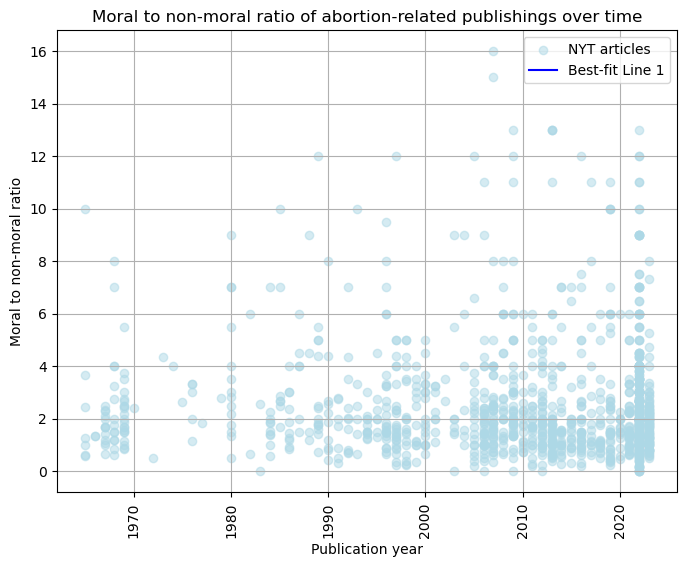

In [38]:
# best fit line not showing up

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(nyt_df.year, nyt_df.moral_nonmoral_ratio, alpha=0.5, color='lightblue', label='NYT articles')

coefficients_nyt = np.polyfit(nyt_df.year, nyt_df.moral_nonmoral_ratio, 1)

slope1, intercept1 = coefficients_nyt[0], coefficients_nyt[1]

best_fit_line1 = slope1 * nyt_df.year + intercept1

plt.plot(nyt_df.year, best_fit_line1, c='b', label='Best-fit Line 1')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Moral to non-moral ratio')
plt.title('Moral to non-moral ratio of abortion-related publishings over time')
plt.grid()
plt.show()

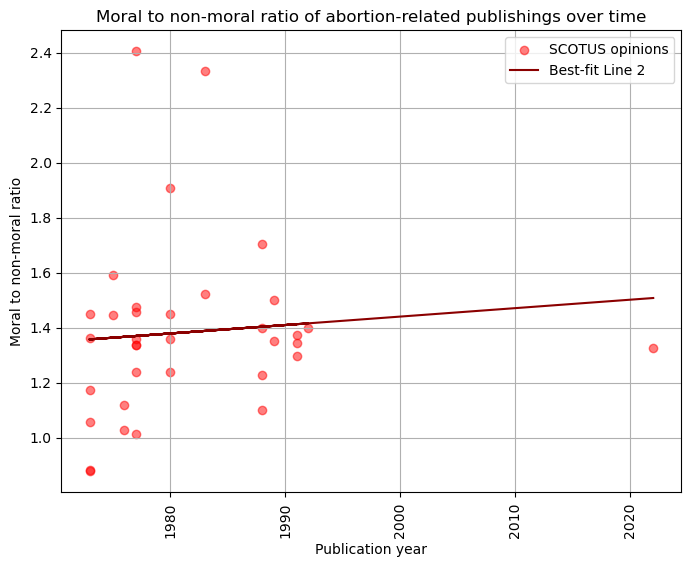

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(sc_df.year_filed, sc_df.moral_nonmoral_ratio, alpha=0.5, color='red', label='SCOTUS opinions')

coefficients_sc = np.polyfit(sc_df.year_filed, sc_df.moral_nonmoral_ratio, 1)

slope2, intercept2 = coefficients_sc[0], coefficients_sc[1]

best_fit_line2 = slope2 * sc_df.year_filed + intercept2

plt.plot(sc_df.year_filed, best_fit_line2, c='darkred', label='Best-fit Line 2')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Moral to non-moral ratio')
plt.title('Moral to non-moral ratio of abortion-related publishings over time')
plt.grid()
plt.show()

best fit line indicates SC has higher moral to non-moral over time

In [41]:
averages_mnm_nyt = nyt_df.groupby('year')['moral_nonmoral_ratio'].mean()
averages_mnm_sc = sc_df.groupby('year_filed')['moral_nonmoral_ratio'].mean()

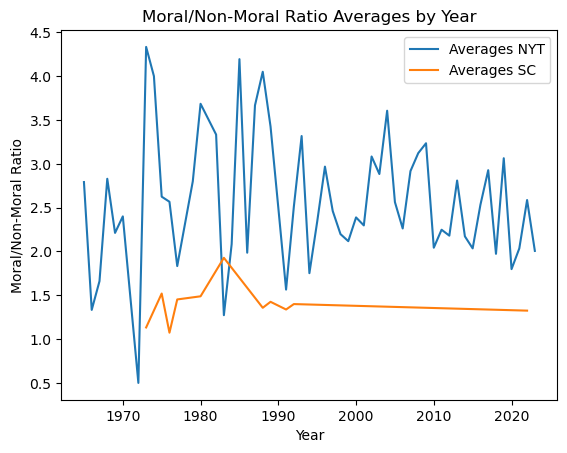

In [46]:
# plotting averages

plt.plot(averages_mnm_nyt.index, averages_mnm_nyt.values, label='Averages NYT')

plt.plot(averages_mnm_sc.index, averages_mnm_sc.values, label='Averages SC')

plt.xlabel('Year')
plt.ylabel('Moral/Non-Moral Ratio')
plt.title('Moral/Non-Moral Ratio Averages by Year')

plt.legend()

# Show the plot
plt.show()



overall NYT way higher moral-non moral ratio 

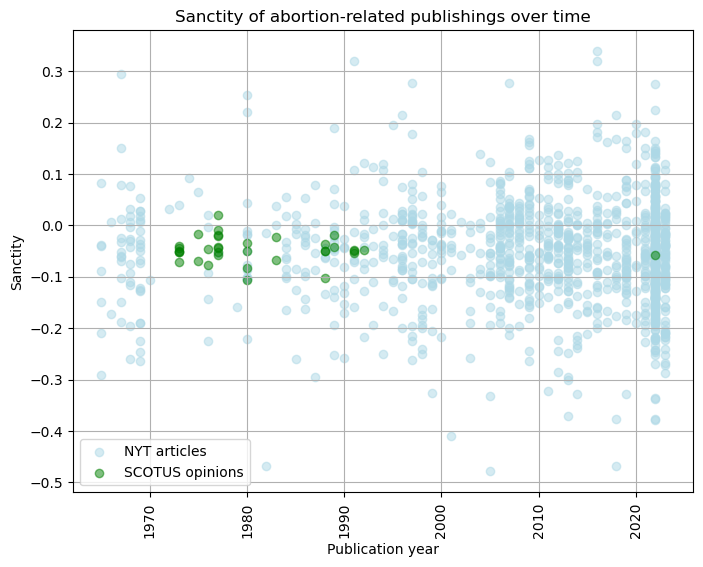

In [6]:
#visualize sanctity scores over time
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(nyt_df.year, nyt_df.sanctity_sent, alpha=0.5, color='lightblue', label='NYT articles')
plt.scatter(sc_df.year_filed, sc_df.sanctity_sent, alpha=0.5, color='green', label='SCOTUS opinions')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Sanctity')
plt.title('Sanctity of abortion-related publishings over time')
plt.grid()
plt.show()

In [7]:
# running vice virtue analysis

from emfdscore.scoring import score_docs 

num_docs_nyt = len(template_input_nyt)
num_docs_sc = len(template_input_sc)

DICT_TYPE = 'mfd'
PROB_MAP = 'all'
SCORE_METHOD = 'bow'
OUT_METRICS = ''

#create new dfs to hold the results
df_nyt_v = score_docs(template_input_nyt, DICT_TYPE, PROB_MAP, SCORE_METHOD, OUT_METRICS, num_docs_nyt)
df_sc_v = score_docs(template_input_sc, DICT_TYPE, PROB_MAP, SCORE_METHOD, OUT_METRICS, num_docs_sc)
#combine dfs that hold the initial data with the results
nyt_df_v = pd.concat((nyt, df_nyt_v), axis=1)
sc_df_v = pd.concat((sc, df_sc_v), axis=1).drop(columns=['Unnamed: 0.2'])
#examine output for SC
sc_df_v.head()

Processed: 1189 100% |❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤| Elapsed Time: 0:00:08 Time:  0:00:08
Processed: 35 100% |❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤| Elapsed Time: 0:00:14 Time:  0:00:14


,author_name,category,per_curiam,case_name,date_filed,federal_cite_one,absolute_url,cluster,year_filed,scdb_id,...,authority.virtue,sanctity.virtue,care.vice,fairness.vice,loyalty.vice,authority.vice,sanctity.vice,moral,moral_nonmoral_ratio,f_var
0,Justice Blackmun,majority,False,Roe v. Wade,1973-01-22,NaN,https://www.courtlistener.com/opinion/108713/r...,https://www.courtlistener.com/api/rest/v3/clus...,1973,1972-048,...,0.332061,0.011450,0.039440,0.013995,0.017812,0.113232,0.003817,0.134860,0.058657,0.010225
1,Justice O'Connor and Kennedy and Souter,majority,False,Planned Parenthood of Southeastern Pa. v. Casey,1992-06-29,NaN,https://www.courtlistener.com/opinion/112786/p...,NaN,1992,1991-117,...,0.267380,0.010695,0.117647,0.030303,0.035651,0.049911,0.003565,0.160428,0.066548,0.006358
2,Justice Stewart,concurring,False,Roe v. Wade,1973-01-22,NaN,https://www.courtlistener.com/opinion/108713/r...,https://www.courtlistener.com/api/rest/v3/clus...,1973,1972-048,...,0.125000,0.000000,0.062500,0.000000,0.000000,0.093750,0.000000,0.187500,0.074592,0.007172
3,Justice Rehnquist,dissenting,False,Roe v. Wade,1973-01-22,NaN,https://www.courtlistener.com/opinion/108713/r...,https://www.courtlistener.com/api/rest/v3/clus...,1973,1972-048,...,0.209877,0.074074,0.098765,0.000000,0.012346,0.086420,0.012346,0.185185,0.043478,0.006070
4,per_curiam,per_curiam,True,Poelker v. Doe,1977-06-20,NaN,https://www.courtlistener.com/opinion/109712/p...,https://www.courtlistener.com/api/rest/v3/clus...,1977,1976-157,...,0.310000,0.000000,0.000000,0.010000,0.040000,0.030000,0.010000,0.200000,0.050556,0.011366


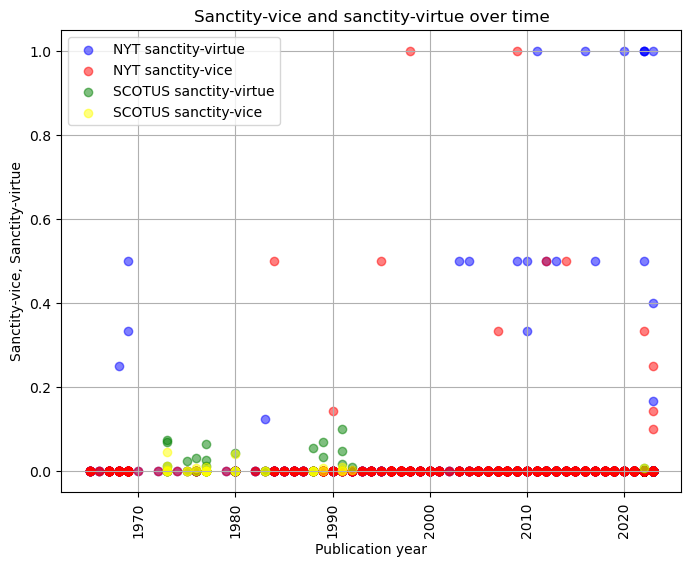

In [8]:
#visualize sanctity.vice over time
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(nyt_df.year, nyt_df_v['sanctity.virtue'], alpha=0.5, color='blue', label='NYT sanctity-virtue')
plt.scatter(nyt_df.year, nyt_df_v['sanctity.vice'], alpha=0.5, color='red', label='NYT sanctity-vice')
plt.scatter(sc_df.year_filed, sc_df_v['sanctity.virtue'], alpha=0.5, color='green', label='SCOTUS sanctity-virtue')
plt.scatter(sc_df.year_filed, sc_df_v['sanctity.vice'], alpha=0.5, color='yellow', label='SCOTUS sanctity-vice')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Sanctity-vice, Sanctity-virtue')
plt.title('Sanctity-vice and sanctity-virtue over time')
plt.grid()
plt.savefig('san_vice_san_virtue.png')
plt.show()

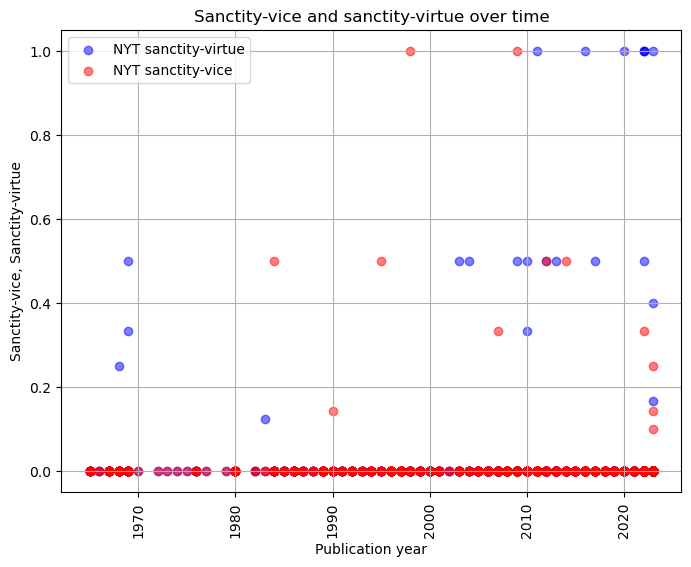

In [21]:
#visualize sanctity.vice over time SEPARATELY
# nyt first
plt.figure(figsize=(8, 6))
plt.scatter(nyt_df.year, nyt_df_v['sanctity.virtue'], alpha=0.5, color='blue', label='NYT sanctity-virtue')
plt.scatter(nyt_df.year, nyt_df_v['sanctity.vice'], alpha=0.5, color='red', label='NYT sanctity-vice')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Sanctity-vice, Sanctity-virtue')
plt.title('Sanctity-vice and sanctity-virtue over time')
plt.grid()
plt.savefig('san_vice_san_virtue_nyt.png')
plt.show()

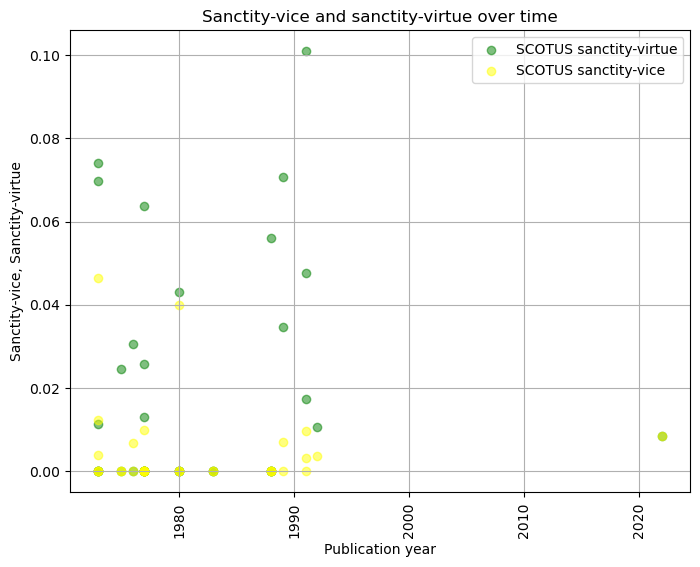

In [23]:
# SC next
plt.figure(figsize=(8, 6))
plt.scatter(sc_df.year_filed, sc_df_v['sanctity.virtue'], alpha=0.5, color='green', label='SCOTUS sanctity-virtue')
plt.scatter(sc_df.year_filed, sc_df_v['sanctity.vice'], alpha=0.5, color='yellow', label='SCOTUS sanctity-vice')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Sanctity-vice, Sanctity-virtue')
plt.title('Sanctity-vice and sanctity-virtue over time')
plt.grid()
plt.savefig('san_vice_san_virtue_nyt.png')
plt.show()

Overall conclusions from this: 
SC consistently mentions sanctity mf (moral foundation) in a more positive light. Over the years, it has also gotten more positive, until the 2022 ruling. (need more input) 

NYT sanctity.vice has dropped in recent years, and sanctity.virtue has increased. More positive light overall.

# Prediction model

Given a corpus, what is the predicted sanctity score?

In [9]:
from utils import *

In [10]:
#CLEAN TEXT

df = pd.concat((sc_df[['text', 'sanctity_sent']], 
                nyt_df[['abstract', 'sanctity_sent']].rename(columns={'abstract':'text'})), 
               axis=0, ignore_index=True).dropna(how='any', axis=0)

print(df.shape)

text_clean = []
for i in df['text']:
    try:
        text_clean.append(clean_text(i))
    except:
        print(i)
df['text_clean'] = text_clean

(1213, 2)


In [11]:
#remove stopwords
df['text_remsw'] = df['text_clean'].apply(rem_sw)

#stem (this uses PorterStemmer)
df['text_stem'] = df['text_remsw'].apply(stem_fun)

#turn each corpus into df?

#vectorize
vec = vec_fun(df['text_stem'], 1, 1, 'tfidf', '')

#train test split df
X = vec
y = df['sanctity_sent']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

#train RF model on train set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(X_train, y_train)

#score RF model on test set
print(rf.score(X_test, y_test))
print(rf.feature_importances_)
print(sorted(rf.feature_importances_)[::-1][:3])

-0.13505362728054449
[0.00000000e+00 8.31670574e-07 1.24791438e-05 ... 0.00000000e+00
 1.20216154e-13 0.00000000e+00]
[0.0212573687748257, 0.020202964109141047, 0.01101305568777189]


In [12]:
#tune hyperparams
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [10, 20, 30],
             'max_depth' : [10, 20, 30]}

grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5).fit(X_train, y_train)
print('Best params: {}'.format(grid.best_params_))
print('Train set score: {}'.format(grid.score(X_train, y_train)))
print('Test set score: {}'.format(grid.score(X_test, y_test)))

Best params: {'max_depth': 10, 'n_estimators': 30}
Train set score: 0.21679408037610726
Test set score: -0.031901410017020515


# Archive

## Data cleaning (not necessary for eFMD)

In [13]:
def clean_text(str_in):
    import re
    tmp = re.sub(r'[^\w]', " ",str_in).lower().strip().replace("  ", " ")
    return tmp

#### Clean NYT abstract

In [14]:
abs_clean = []
for i in nyt.abstract:
  try:
    abs_clean.append(clean_text(i))
  except:
    abs_clean.append('')

nyt['abstract_clean'] = abs_clean
nyt = nyt[['pub_date', 'abstract_clean']]
nyt.head()

,pub_date,abstract_clean
0,2023-03-17T19:54:54+0000,cases in poland and texas bring legal vulnerab...
1,2023-03-18T02:30:36+0000,the law is the only one in the nation to prohi...
2,2023-03-08T11:46:02+0000,since roe v wade ended the battle over legal a...
3,2023-03-13T22:23:59+0000,six works in a lewis clark exhibition about he...
4,2023-03-14T19:44:31+0000,it was the first conviction of its type in the...


#### Clean Supreme Court decisions

In [15]:
text_clean = []
for i in sc.text:
  try:
    text_clean.append(clean_text(i))
  except:
    text_clean.append('')

sc['text_clean'] = text_clean
sc = sc[['year_filed', 'text_clean']]
sc.head()

,year_filed,text_clean
0,1973,this texas federal appeal and its georgia comp...
1,1992,i liberty finds no refuge in a jurisprudence o...
2,1973,in 1963 this court in ferguson v skrupa 372 u ...
3,1973,the court s opinion brings to the decision of ...
4,1977,respondent jane doe an indigent sought unsucce...


### Plotting all variables

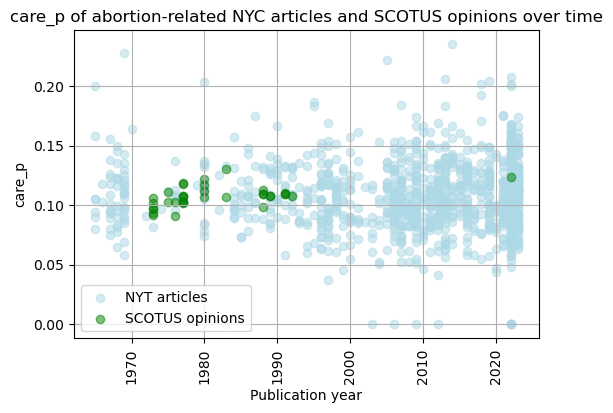

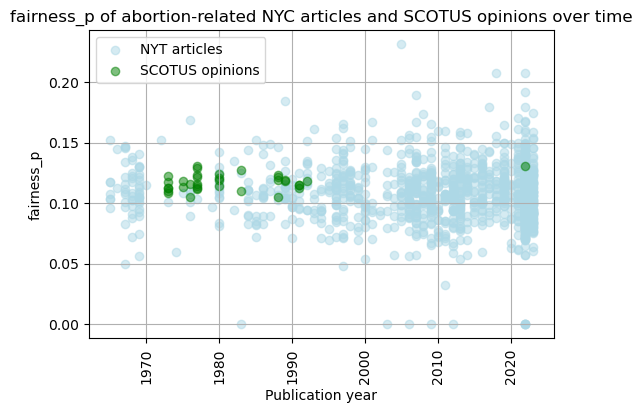

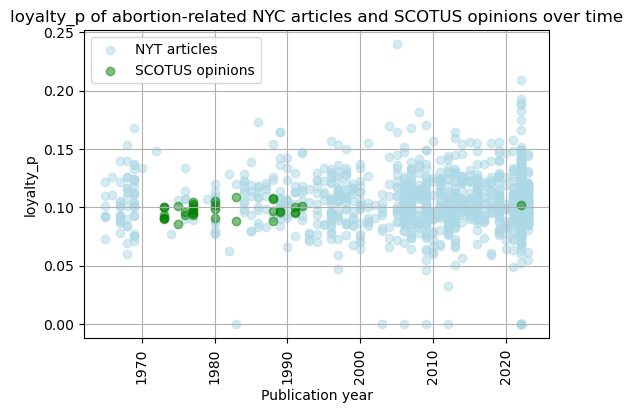

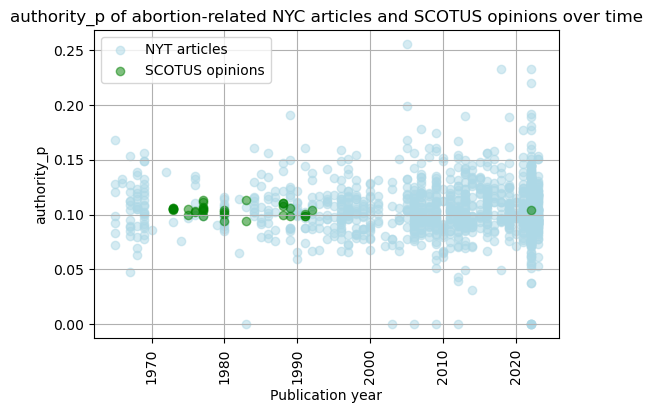

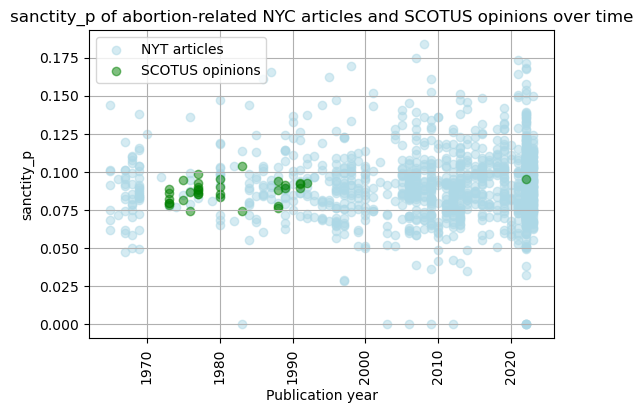

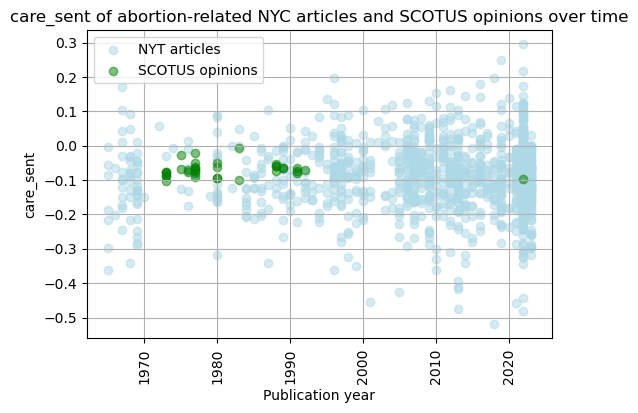

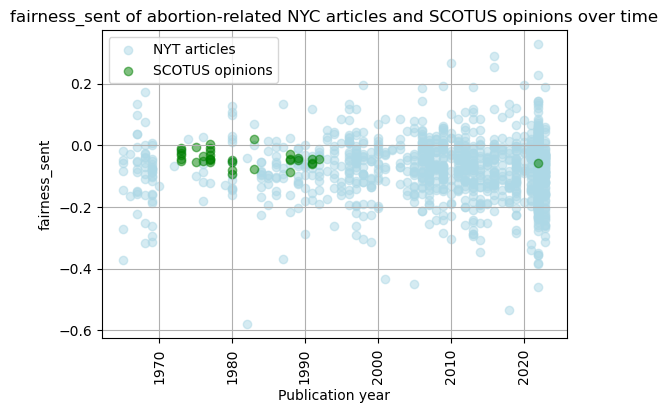

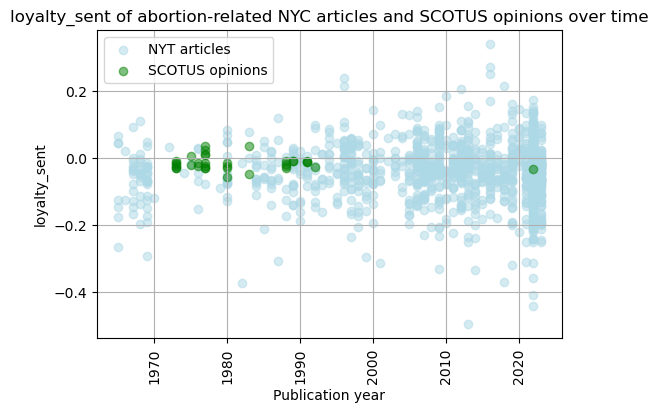

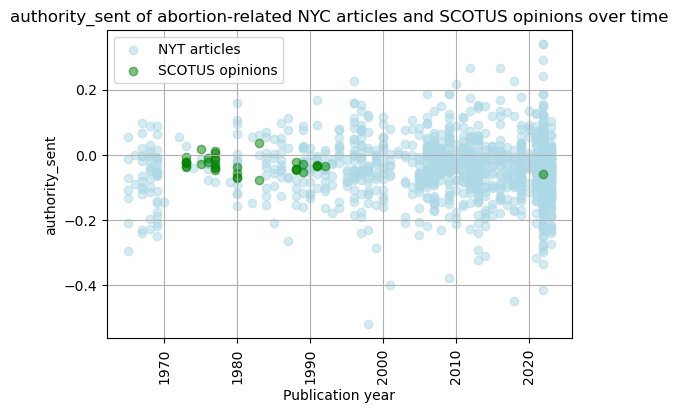

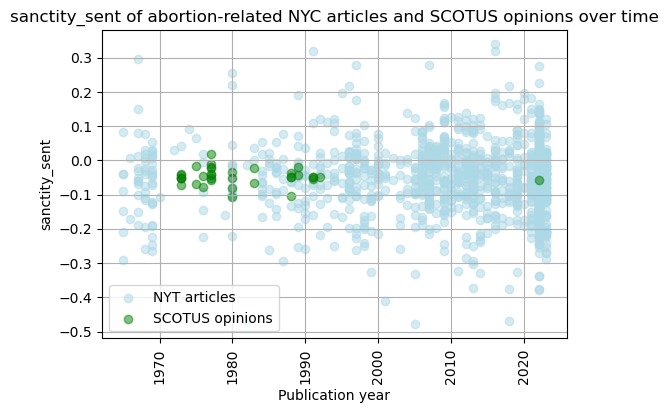

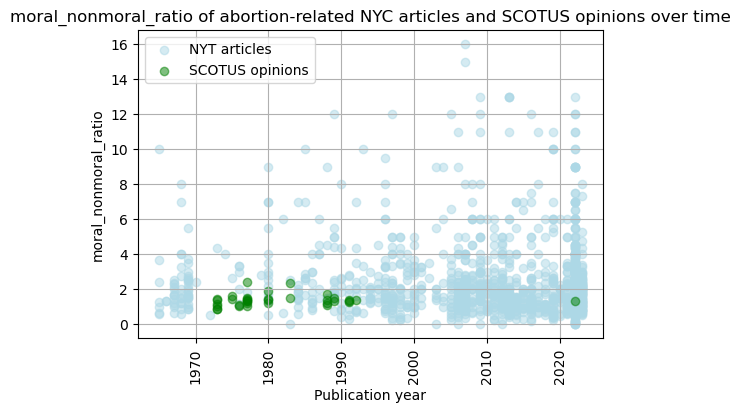

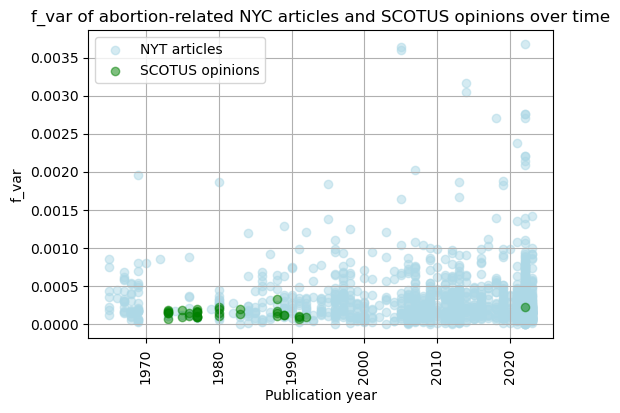

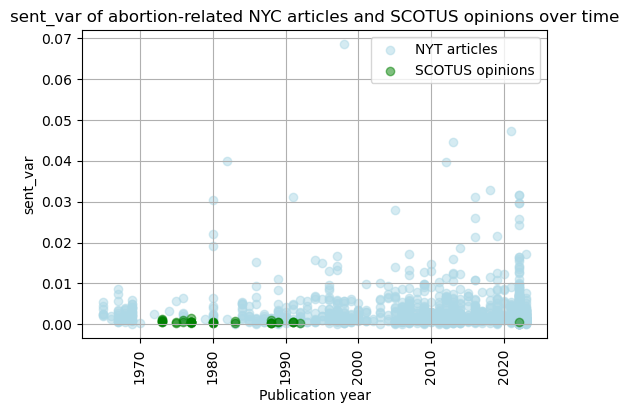

In [16]:
import matplotlib.pyplot as plt

metrics = ['care_p', 'fairness_p', 'loyalty_p', 'authority_p', 'sanctity_p', 
'care_sent', 'fairness_sent', 'loyalty_sent', 'authority_sent',
'sanctity_sent', 'moral_nonmoral_ratio', 'f_var', 'sent_var']

for i in metrics:
  plt.figure(figsize=(6, 4))
  plt.scatter(nyt_df.year, nyt_df[i], alpha=0.5, color='lightblue', label='NYT articles')
  plt.scatter(sc_df.year_filed, sc_df[i], alpha=0.5, color='green', label='SCOTUS opinions')
  plt.legend()
  plt.xticks(rotation=90)
  plt.xlabel('Publication year')
  plt.ylabel(str(i))
  plt.title('{} of abortion-related NYC articles and SCOTUS opinions over time'.format(str(i)))
  plt.grid()
  plt.savefig('{}overtime.png'.format(str(i)))
  plt.show()

#### Note: scores that are calculated:


```
'care_p', 'fairness_p', 'loyalty_p', 'authority_p', 'sanctity_p', 
'care_sent', 'fairness_sent', 'loyalty_sent', 'authority_sent',
'sanctity_sent', 'moral_nonmoral_ratio', 'f_var', 'sent_var'
```

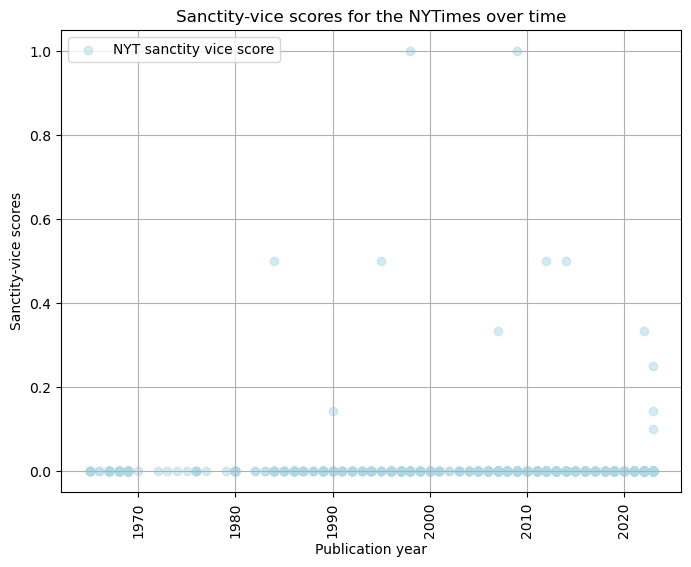

In [17]:
#visualize sanctity.vice over time
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(nyt_df.year, nyt_df_v['sanctity.vice'], alpha=0.5, color='lightblue', label='NYT sanctity vice score')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Sanctity-vice scores')
plt.title('Sanctity-vice scores for the NYTimes over time')
plt.grid()
plt.show()

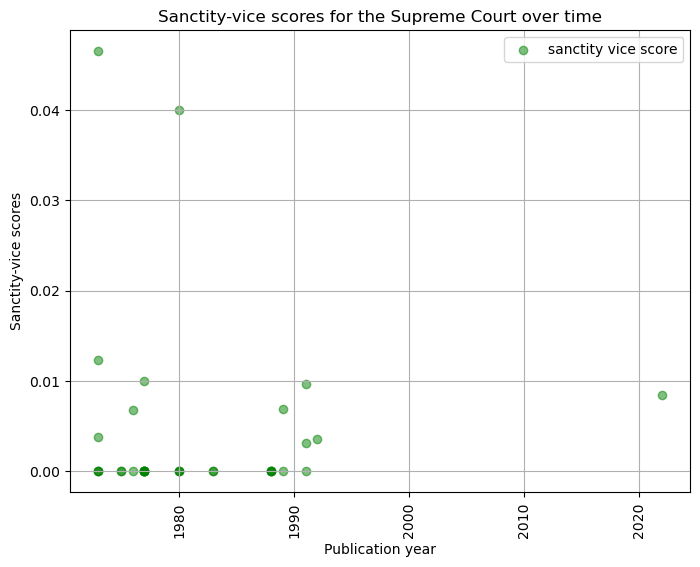

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(sc_df.year_filed, sc_df_v['sanctity.vice'], alpha=0.5, color='green', label='sanctity vice score')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Sanctity-vice scores')
plt.title('Sanctity-vice scores for the Supreme Court over time')
plt.grid()
plt.show()

## Scrapped idea for prediction model - given SCOTUS sanctity score in a given year, what will NYT sanctity score be?

In [19]:
#subset dfs, group by year

sc_tmp = pd.concat((sc_df_v[['sanctity.virtue', 'sanctity.vice', 'year_filed']], sc_df[['sanctity_sent']]), axis=1)
sc_tmp.shape

nyt_tmp = pd.concat((nyt_df_v[['sanctity.virtue', 'sanctity.vice', 'year']], nyt_df[['sanctity_sent']]), axis=1)
nyt_tmp.shape

sc_tmp = sc_tmp.groupby('year_filed').max() #can change this to mean, median, min, etc.
nyt_tmp = nyt_tmp.groupby('year').max()

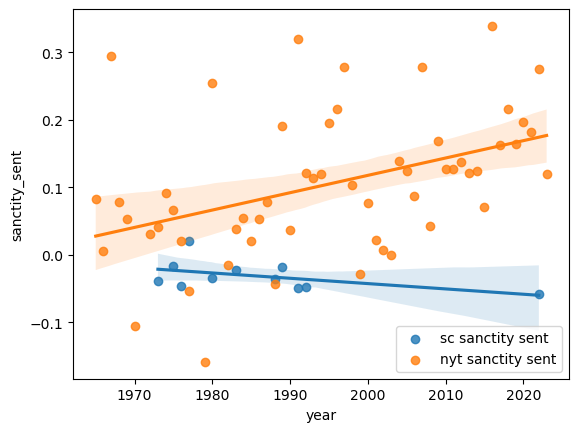

In [20]:
import seaborn as sns
sns.regplot(data=sc_tmp, x=sc_tmp.index, y='sanctity_sent', label='sc sanctity sent')
sns.regplot(data=nyt_tmp, x=nyt_tmp.index, y='sanctity_sent', label='nyt sanctity sent')
plt.legend()
plt.show()